# Your First Machine Learning Project - Detecting Breast Cancer
TODO: Write-up background on this project and SVM

## Steps in this project

1. Getting the needed libraries.
2. Getting the data
3. Getting the data into a usable form.
4. Exploring the data.
5. Preparing the data for training.
6. Preparing the training and testing sets
7. Training the model.
8. Testing the model.

## Practical 

### Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn

## Breast Cancer data

In [2]:
from sklearn.datasets import load_breast_cancer #Loading the breast cancer from a standard repository
cancer = load_breast_cancer()

Now, let's look at the dataset:

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

That's not very human-readable, so let's transform it a little. Let's start by getting the name of the fields.

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
print(cancer['target']) #This shows the class of the cancer in code form.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
print(type(cancer['target'][0]))

<class 'numpy.int32'>


In [8]:
print(cancer['target_names'])

['malignant' 'benign']


In [9]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### DataFrame
Using a dataframe object can make manipulating this data easier.

In [10]:
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns = np.append(cancer['feature_names'], ['target']))

One issue to be aware of that TensorFlow does not allow spaces in Feature names, so we will fix that now.

In [11]:
for key in df_cancer.keys():
    newkey = key.replace(" ", "_")
    df_cancer.rename(index=str,columns={key:newkey},inplace=True)
print(df_cancer.keys())

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'target'],
      dtype='object')


In [12]:
df_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [13]:
df_cancer.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


# Visualization of the Data

Let's look at the relationships between some of the variables, to get some idea of what models might be best for this system.

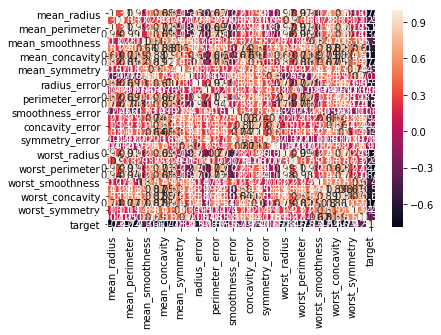

In [14]:
sns.heatmap(df_cancer.corr(), annot=True)

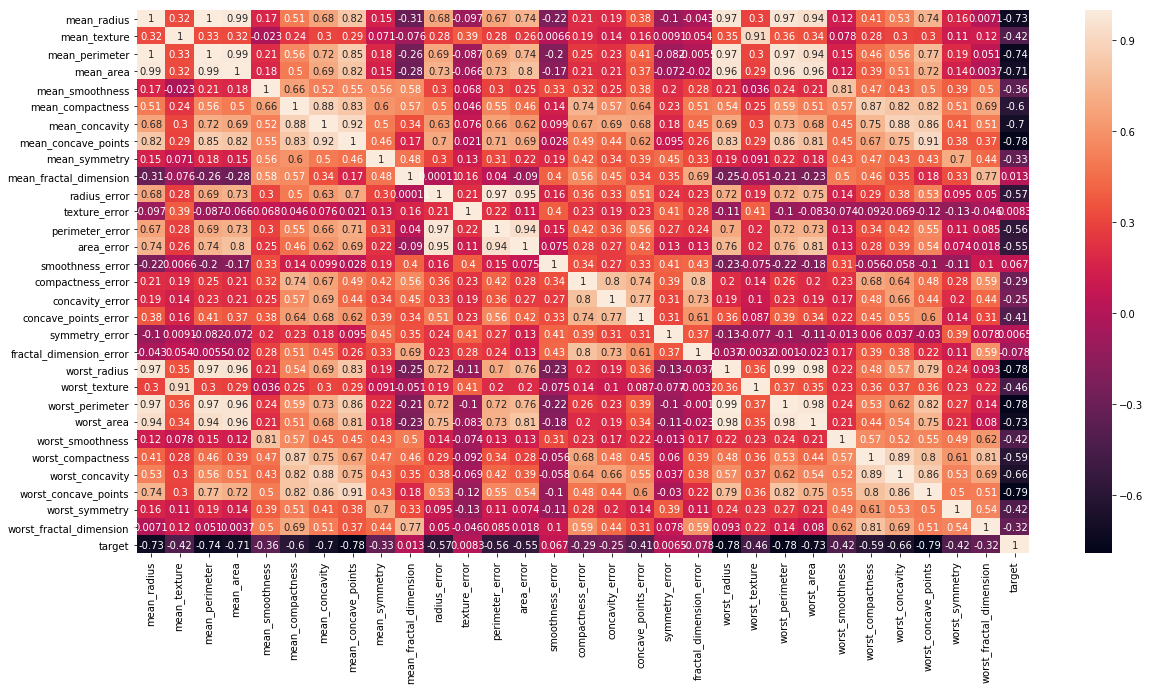

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(),annot=True)

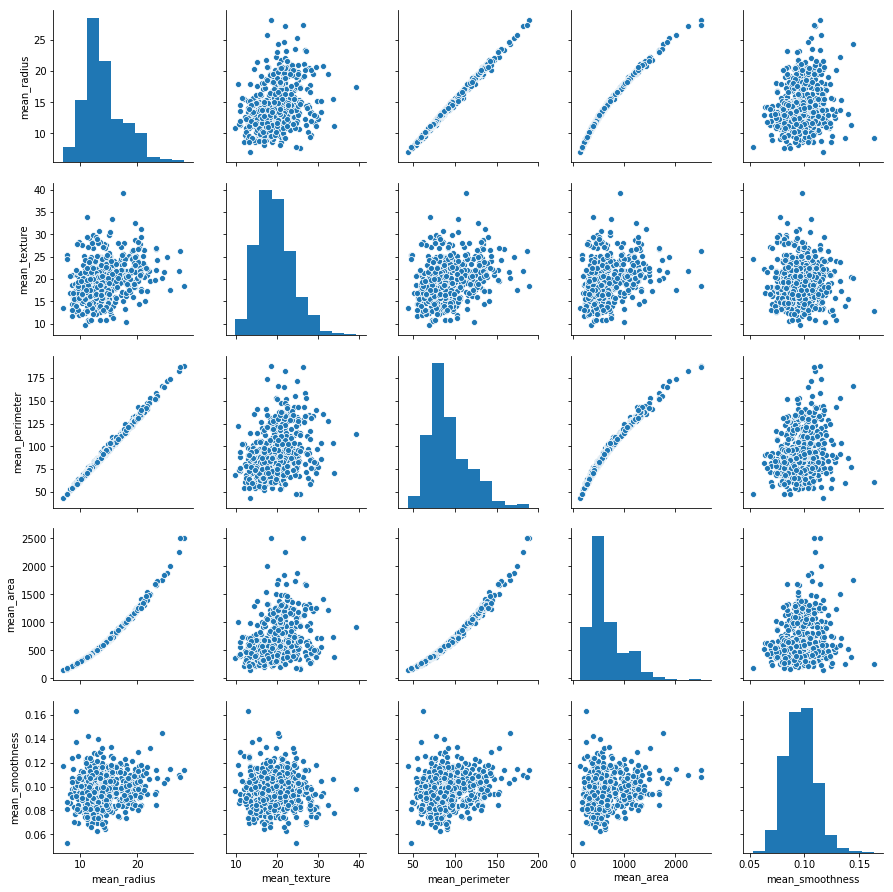

In [16]:
sns.pairplot(df_cancer,vars = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'])

That doesn't tell us which cases are maligent vs beign, so we will add that information. The 'hue' keyword does that. 

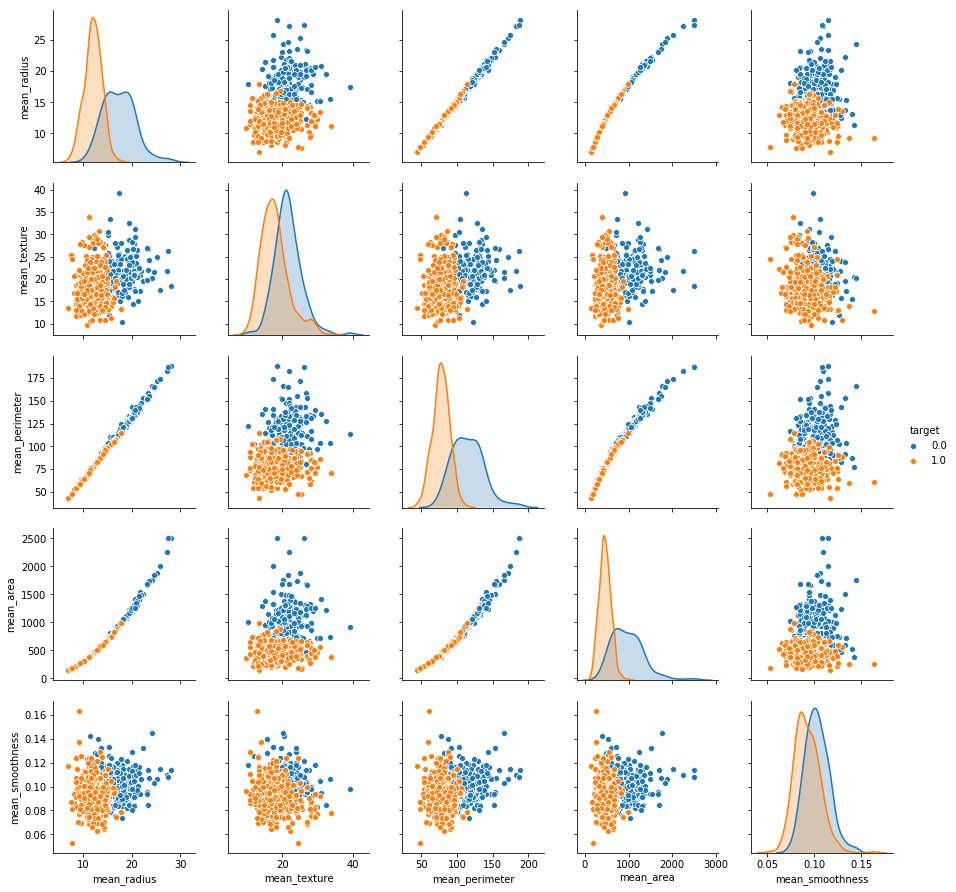

In [18]:
sns.pairplot(df_cancer,hue = 'target', vars = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'])

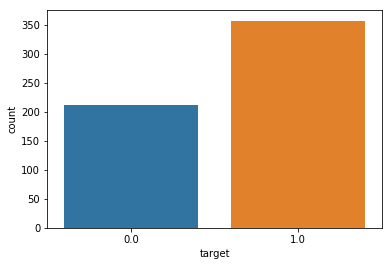

In [19]:
sns.countplot(df_cancer['target']) 

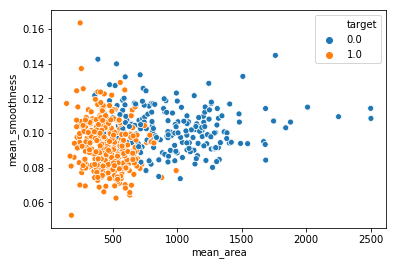

In [20]:
sns.scatterplot(x= 'mean_area', y='mean_smoothness', hue='target',data=df_cancer)

*With this information in hand, we should now be able to develop a model which we can use to make predictions.* With that in mind, I am defining my feature set to use the mean parameters.

In [21]:
features = ['mean_radius','mean_texture','mean_perimeter', 'mean_compactness', 'mean_concavity', 'mean_symmetry', 'mean_fractal_dimension' ]
labels = ['target']

# Model Training

We are going to process the data into a form for the model we will be using. 

## Creating Training and Test sets

In [22]:
randomized_data = df_cancer.reindex(np.random.permutation(df_cancer.index))

In [23]:
randomized_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
409,12.270,17.92,78.41,466.1,0.08685,0.06526,0.032110,0.02653,0.1966,0.05597,...,28.88,89.00,610.2,0.12400,0.1795,0.13770,0.09532,0.3455,0.06896,1.0
218,19.800,21.56,129.70,1230.0,0.09383,0.13060,0.127200,0.08691,0.2094,0.05581,...,28.64,170.30,2009.0,0.13530,0.3235,0.36170,0.18200,0.3070,0.08255,0.0
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.059880,0.02180,0.2341,0.06963,...,19.23,65.59,310.1,0.09836,0.1678,0.13970,0.05087,0.3282,0.08490,1.0
226,10.440,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,0.1788,0.06450,...,19.80,73.47,395.4,0.13410,0.1153,0.02639,0.04464,0.2615,0.08269,1.0
534,10.960,17.62,70.79,365.6,0.09687,0.09752,0.052630,0.02788,0.1619,0.06408,...,26.51,76.43,407.5,0.14280,0.2510,0.21230,0.09861,0.2289,0.08278,1.0


In [24]:
total_records = len(randomized_data)
training_set_size_portion = 0.8
training_set_size = int(total_records*training_set_size_portion)
test_set_size = total_records - training_set_size
print(total_records,training_set_size,test_set_size)

569 455 114


In [25]:
# Build the testing features and labels
testing_features = randomized_data.tail(test_set_size)[features].copy()
testing_labels = randomized_data.tail(test_set_size)[labels].copy()

In [26]:
testing_features.head()

,mean_radius,mean_texture,mean_perimeter,mean_compactness,mean_concavity,mean_symmetry,mean_fractal_dimension
426,10.48,14.98,67.49,0.10130,0.06335,0.1925,0.06915
457,13.21,25.25,84.10,0.05205,0.02772,0.1619,0.05584
129,19.79,25.12,130.40,0.15890,0.25450,0.2202,0.06113
337,18.77,21.43,122.90,0.14020,0.10600,0.1953,0.06083
221,13.56,13.90,88.59,0.11920,0.07860,0.1962,0.06303


In [27]:
testing_labels.head()

,target
426,1.0
457,1.0
129,0.0
337,0.0
221,1.0


In [28]:
print(testing_labels['target'][0], type(testing_labels['target'][0]))

1.0 <class 'numpy.float64'>


In [29]:
# Build the training features and labels
training_features = randomized_data.head(training_set_size)[features].copy()
training_labels = randomized_data.head(training_set_size)[labels].copy()
print(training_features.head())
print(training_labels.head())

     mean_radius  mean_texture  mean_perimeter  mean_compactness  \
409       12.270         17.92           78.41           0.06526   
218       19.800         21.56          129.70           0.13060   
63         9.173         13.86           59.20           0.08751   
226       10.440         15.46           66.62           0.07722   
534       10.960         17.62           70.79           0.09752   

     mean_concavity  mean_symmetry  mean_fractal_dimension  
409        0.032110         0.1966                 0.05597  
218        0.127200         0.2094                 0.05581  
63         0.059880         0.2341                 0.06963  
226        0.006643         0.1788                 0.06450  
534        0.052630         0.1619                 0.06408  
     target
409     1.0
218     0.0
63      1.0
226     1.0
534     1.0


## Create TensorFlow Feature Columns

In [30]:
feature_columns = [tf.feature_column.numeric_column(key) for key in features]

In [31]:
print(feature_columns)

[_NumericColumn(key='mean_radius', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='mean_texture', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='mean_perimeter', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='mean_compactness', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='mean_concavity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='mean_symmetry', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='mean_fractal_dimension', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


## Define the Neural Network used to classify the data

With the data in hand, we will now create the neural network which will be tained on this data. Since we are using a DNN, we will have to specify 
* The features
* The structure of the network, which will be a [10,20,10] --- 10 neturons -> 20 neurons -> 10 neuron in the "hidden units"
* The number of classes that are possible for our classification, which is 2 in this case (0-maligenet 1-beign)
* A work directory

In [48]:
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,hidden_units=[10,20,10], n_classes=2,model_dir='tmp/model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tmp/model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000194194C93C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Train the network

We define the trianing input function

In [65]:
train_input_fn = tf.estimator.inputs.pandas_input_fn(x=training_features, y=training_labels['target'], num_epochs=15,shuffle=True)

In [66]:
print(type(training_features['mean_radius']), type(training_labels['target']))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [67]:
# Train the model using the classifer
classifier.train(input_fn=train_input_fn,steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/model\model.ckpt-464
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 464 into tmp/model\model.ckpt.
INFO:tensorflow:loss = 47.206585, step = 465
INFO:tensorflow:Saving checkpoints for 518 into tmp/model\model.ckpt.
INFO:tensorflow:Loss for final step: 20.085882.


## Testing the Model

In [68]:
test_input_fn = tf.estimator.inputs.pandas_input_fn(x=testing_features,y=testing_labels['target'],num_epochs=15,shuffle=False)

In [69]:
classifier.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-07-12:20:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/model\model.ckpt-518
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-07-12:20:38
INFO:tensorflow:Saving dict for global step 518: accuracy = 0.8947368, accuracy_baseline = 0.55263156, auc = 0.9652972, auc_precision_recall = 0.966706, average_loss = 0.38205242, global_step = 518, label/mean = 0.55263156, loss = 46.664974, precision = 0.8695652, prediction/mean = 0.55097604, recall = 0.95238096
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 518: tmp/model\model.ckpt-518


{'accuracy': 0.8947368,
 'accuracy_baseline': 0.55263156,
 'auc': 0.9652972,
 'auc_precision_recall': 0.966706,
 'average_loss': 0.38205242,
 'label/mean': 0.55263156,
 'loss': 46.664974,
 'precision': 0.8695652,
 'prediction/mean': 0.55097604,
 'recall': 0.95238096,
 'global_step': 518}

In [70]:
accuracy_score = classifier.evaluate(input_fn=test_input_fn)["accuracy"]
print("Accuracy = {}".format(accuracy_score))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-07-12:20:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/model\model.ckpt-518
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-07-12:20:43
INFO:tensorflow:Saving dict for global step 518: accuracy = 0.8947368, accuracy_baseline = 0.55263156, auc = 0.9652972, auc_precision_recall = 0.966706, average_loss = 0.38205242, global_step = 518, label/mean = 0.55263156, loss = 46.664974, precision = 0.8695652, prediction/mean = 0.55097604, recall = 0.95238096
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 518: tmp/model\model.ckpt-518
Accuracy = 0.8947368264198303
